# Import Libraries

In [193]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from sklearn import preprocessing, tree


import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix



from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report



# Loading dataset

In [194]:

df = pd.read_csv('houses.csv')
df.head(1)

,Unnamed: 0,id,region_no,price,building_cond,living_area,property_type,rooms_number,zip_code,land_area,...,swimming_pool,furnished,open_fire,terrace,terrace_area,facades_number,building_state,province,region,building_condition
0,0,10147032,6,159000,2,122,house,2,4430,335,...,0,0,0,1,20,2,0,Liège,Wallonia,Good


# Creating few features based on categorical features :

1) Selecting the room column and i am narrowing my result based on room numbers

2) Selecting the region to narrow down my results. This will give me the focused result based upon the region.

3) For focused result i have narrow down the parameters of selecting the houses based upon price.

These three parameters how help us selecting our best model. Lets see....

In [195]:
#removing the columns not required for further processing
rem_col = ['Unnamed: 0', 'id','province','region','building_condition', 'zip_code' ]
df.drop(rem_col, axis=1, inplace=True)



In [196]:
#Narrowing the bedrooms
df = df[df["rooms_number"] <= 10]

In [197]:
# As i have divided the region and given 1 to 11 values. Now i am narrowing my dataset to region_no: 1
#df = df[df["region_no"] == 1]
#brussels = df[df["region_no"] == 1]

In [198]:
df.region_no.value_counts()

11    1160
10     884
6      871
3      864
8      806
4      563
2      558
1      551
9      353
7      292
5      136
Name: region_no, dtype: int64

In [199]:
#Narrowing down the houses as per price.
        #remove price > 500_000
df = df[df['price'] < 14000000]
        #remove price < 50_000
df = df[df['price'] >   100000]

In [200]:
df.shape

(6882, 17)

In [201]:
#brussels = df.drop(df[(df['region_no'] = '1')].index)
#brussels.to_csv('brussels.csv')

In [202]:
#df['living_area'] = df['living_area'].fillna(df.groupby(['property_type','rooms_number'])['living_area'].transform('mean'))

In [203]:
houses = df

In [204]:
final_csv = houses
final_csv.to_csv('final_data.csv')

In [205]:
#now we have all numeric values. Lets check the corrilation between variables
houses.corr()

C:\Users\sheet\AppData\Local\Temp\ipykernel_2516\673662426.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  houses.corr()


,region_no,price,building_cond,living_area,rooms_number,land_area,garden,garden_area,equipped_kitchen,swimming_pool,furnished,open_fire,terrace,terrace_area,facades_number,building_state
region_no,1.000000,-0.250404,-0.009892,-0.123914,-0.165892,-0.011567,-0.181291,-0.044416,-0.021674,-0.089982,0.031665,-0.064009,-0.214786,-0.066636,-0.132721,0.008594
price,-0.250404,1.000000,0.046096,0.648379,0.427603,0.260541,-0.002064,0.162538,-0.000539,0.338030,0.039723,0.160258,-0.013539,0.046429,0.203844,0.241153
building_cond,-0.009892,0.046096,1.000000,-0.005139,0.004916,-0.021401,0.053282,0.018464,0.180849,0.041263,0.008282,0.032569,0.097386,0.025483,0.027009,-0.030138
living_area,-0.123914,0.648379,-0.005139,1.000000,0.542050,0.414484,-0.037982,0.140275,-0.002948,0.291004,0.045722,0.159732,-0.029628,0.047474,0.169875,0.135535
rooms_number,-0.165892,0.427603,0.004916,0.542050,1.000000,0.086908,0.032593,0.109186,0.013971,0.190128,0.049370,0.097028,0.035449,0.069349,0.106115,0.060421
land_area,-0.011567,0.260541,-0.021401,0.414484,0.086908,1.000000,-0.026706,0.162602,0.007968,0.060776,0.010391,0.033601,-0.033531,0.015213,0.106519,0.009874
garden,-0.181291,-0.002064,0.053282,-0.037982,0.032593,-0.026706,1.000000,0.309604,0.072140,0.043821,0.001454,0.008255,0.455823,0.136120,0.100776,0.050138
garden_area,-0.044416,0.162538,0.018464,0.140275,0.109186,0.162602,0.309604,1.000000,0.022620,0.142515,0.003923,0.072614,0.127694,0.118818,0.194562,0.045673
equipped_kitchen,-0.021674,-0.000539,0.180849,-0.002948,0.013971,0.007968,0.072140,0.022620,1.000000,0.022685,0.008300,0.057692,0.092467,0.024143,0.001124,-0.008919
swimming_pool,-0.089982,0.338030,0.041263,0.291004,0.190128,0.060776,0.043821,0.142515,0.022685,1.000000,0.019535,0.105179,0.044291,0.057862,0.157253,0.132382


C:\Users\sheet\AppData\Local\Temp\ipykernel_2516\2654907085.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = houses.corr()


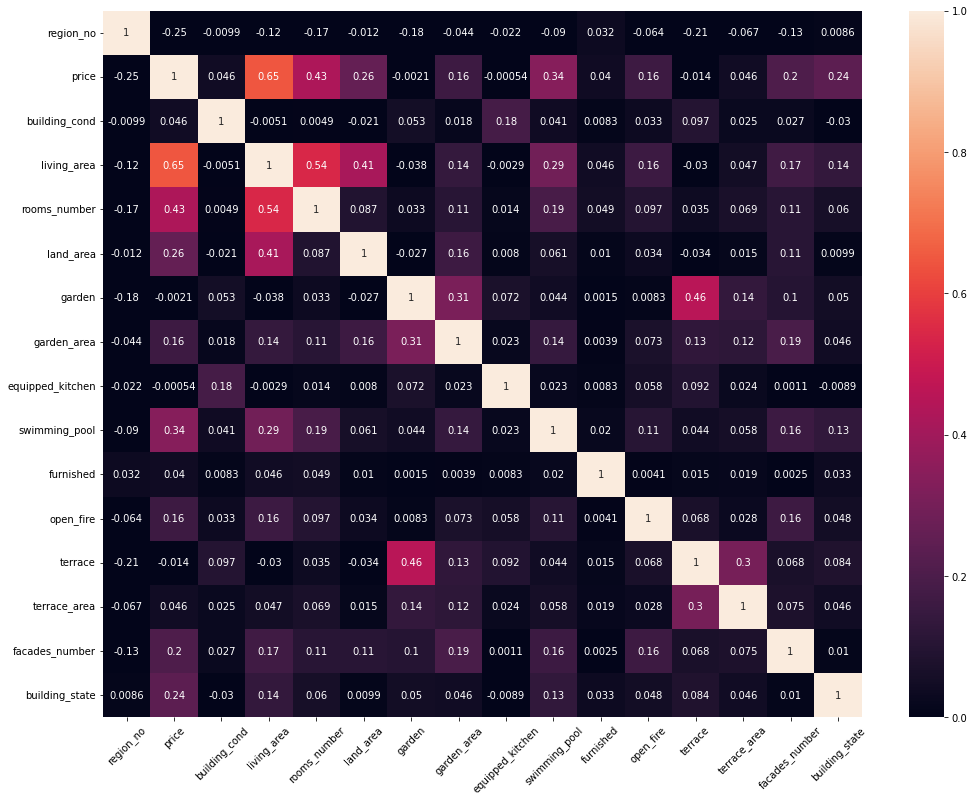

In [206]:
#the correlation matrix to check corrilation between the variables:
corr_matrix = houses.corr()
fig = plt.figure(figsize=(17, 13))
sns.heatmap(corr_matrix, vmin=0, vmax=1,annot=True)

plt.xticks(rotation=45)
plt.savefig('heatmap1.png')
plt.show()

# Model Selection & Testing

1) Data Splitting and Scaling

a) Data Splitting

In [207]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


y= df['price']
X= df[['living_area','rooms_number','facades_number','building_state', 'land_area','swimming_pool','open_fire','building_cond','garden_area']]
#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))


The dimension of X_train is (4817, 9)
The dimension of X_test is (2065, 9)


b) Scaling

In [208]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2) Model Testing

# LinearRegression Model

In [209]:

from sklearn import metrics


#Model
linear_Reg = LinearRegression()

#Fit model
linear_Reg.fit(X_train, y_train)

#predict
r_sq = linear_Reg.score(X, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {linear_Reg.intercept_}")
#print(f"slope: {lr.coef_}")

#actual
actual = y_test


train_score_lr = linear_Reg.score(X_train, y_train)
test_score_lr = linear_Reg.score(X_test, y_test)


print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

coefficient of determination: -19682.117860919832
intercept: 498769.357068715
The train score for lr model is 0.4833457910612231
The test score for lr model is 0.47761085345857046


c:\Users\sheet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


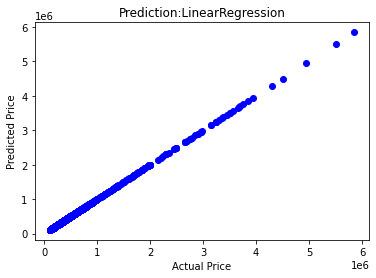

In [210]:
plt.scatter(y_test, actual, c='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction:LinearRegression')
plt.savefig('LinearRegression.png')
plt.show()

# Ridge Regression Model

In [211]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
#Ridge Regression Model
ridge = Ridge(alpha=10)

ridge.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridge.score(X_train, y_train)
test_score_ridge = ridge.score(X_test, y_test)
Ridge_pred = y_test

print("\nRidge Model:\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model:

The train score for ridge model is 0.4833440678884986
The test score for ridge model is 0.4775561935686501


ValueError: x and y must be the same size

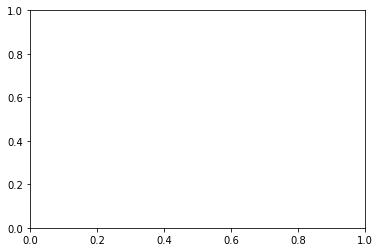

In [212]:
plt.scatter(y_test, pred, c='orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction:RidgeRegressionModel')
plt.savefig('RidgeRegressionModel.png')
plt.show()

In [ ]:
#Ridge regression model without Alpha
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

print("Training set score: {:.3f}".format(ridge.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(ridge.score(X_test, y_test)))

Training set score: 0.795
Test set score: 0.741


# Lasso Model

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection

#Lasso regression model
print("\nLasso Model....................Alpha:10........................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)
pred_lasso = y_test

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Lasso Model....................Alpha:10........................

The train score for ls model is 0.7952389282541039
The test score for ls model is 0.7401472448990926


In [ ]:
print("\nLasso Model....................Alpha:p.1........................\n")
Lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(Lasso.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(Lasso.score(X_test, y_test)))


Lasso Model....................Alpha:p.1........................

Training set score: 0.795
Test set score: 0.740


In [ ]:
# Lasso model with max iter = 10000
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter=10000)
lasso.fit(X_train, y_train)
print("Training set score: {:.3f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(lasso.score(X_test, y_test))) 
#print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.795
Test set score: 0.740


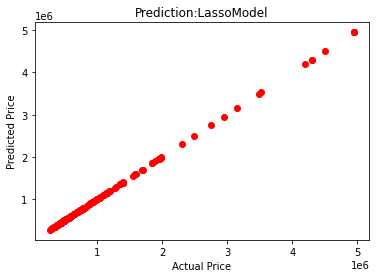

In [ ]:
plt.scatter(y_test, pred_lasso, c='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction:LassoModel')
plt.savefig('LassoModel.png')
plt.show()

# RandomForestClassifier

In [ ]:
# Train the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rf_model = RandomForestRegressor(n_estimators=40,random_state=42)
rf_model.fit(X_train,y_train)
rf_model_pred =rf_model.predict(X_test)

# Score
rf_score=rf_model.score(X_test,y_test)
print('Accuracy score:', rf_score)
actual_RandomForestRegressor = X_test
pred_RandomForestRegressor = y_test


mae = mean_absolute_error(y_test, rf_model_pred )

from sklearn.metrics import r2_score
r2 = r2_score(y_test, rf_model_pred)

Accuracy score: 0.8018402483255216


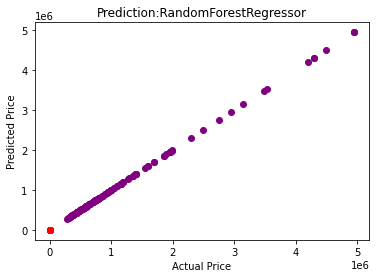

In [ ]:
plt.scatter(X_test, actual_RandomForestRegressor, c='red')
plt.scatter(y_test, pred_RandomForestRegressor, c='purple')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices Vs Predicted Prices')
plt.title('Prediction:RandomForestRegressor')
plt.savefig('RandomForestRegressor.png')
plt.show()

# GradientBoostingRegressor

In [ ]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=40,random_state=42) #28 et 42
gb_regressor.fit(X_train,y_train)
gb_pred =gb_regressor.predict(X_test)

gb_pred =gb_regressor.predict(X_test)

actual_GradientBoostingRegressor = X_test
pred_GradientBoostingRegressor = y_test


# Score
gb_score=gb_regressor.score(X_test,y_test)
print('Score:', gb_score)


Score: 0.811508647541


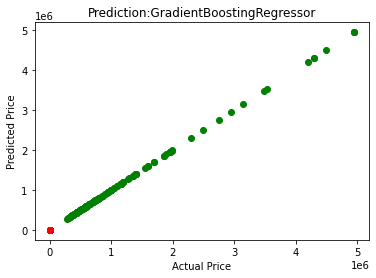

In [ ]:
plt.scatter(X_test, actual_GradientBoostingRegressor, c='red')
plt.scatter(y_test, pred_GradientBoostingRegressor, c='green')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Prediction:GradientBoostingRegressor')
plt.savefig('GradientBoostingRegressor.png')

plt.show()

Saving the Model

In [ ]:
import pickle

pickle.dump(gb_pred, open('gb_regressor.pkl', 'wb'))
load_model1 = pickle.load(open('gb_regressor', 'rb'))
result1 = load_model1.score(X_test, y_test)
print(result1)

FileNotFoundError: [Errno 2] No such file or directory: 'gb_regressor'